#### Use bill_authentication dataset. Your task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem, use SVM algorithm to solve this problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/bank_bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [6]:
X_train.describe()

,Variance,Skewness,Curtosis,Entropy
count,960.000000,960.000000,960.000000,960.000000
mean,0.409875,1.850630,1.446693,-1.199246
std,2.858811,5.923107,4.351654,2.085500
min,-7.042100,-13.773100,-5.261300,-8.548200
25%,-1.805350,-1.875850,-1.457600,-2.382450
50%,0.398130,2.405550,0.596925,-0.615095
75%,2.928000,6.748925,3.146250,0.399980
max,6.824800,12.951600,17.927400,2.162500


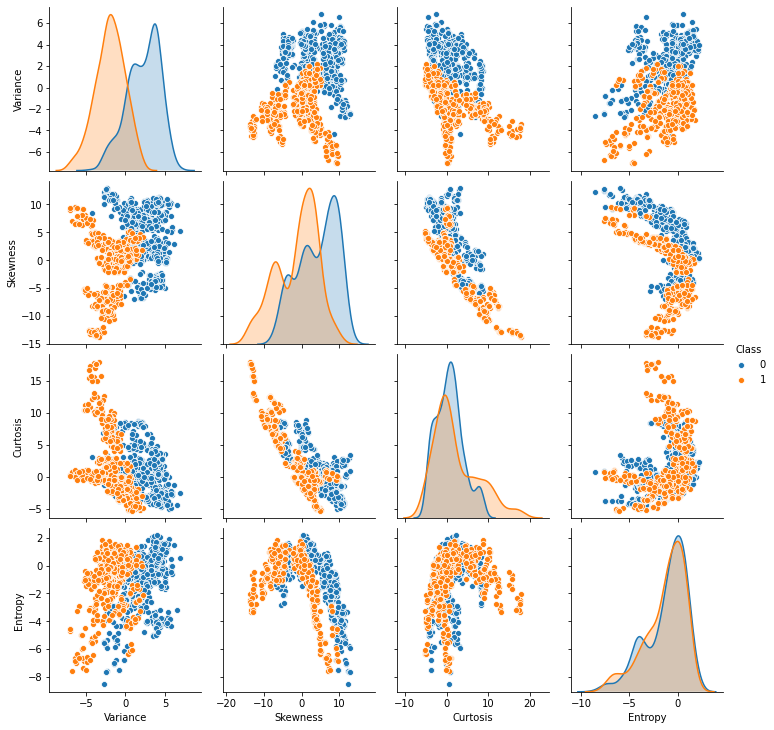

In [7]:
sns.pairplot(X_train.join(y_train), hue='Class')

Text(0.5, 1.0, 'Real v/s Counterfeit')

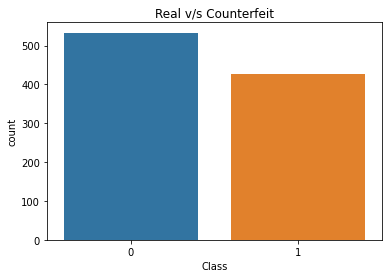

In [8]:
sns.countplot(x = 'Class', data=X_train.join(y_train))
plt.title('Real v/s Counterfeit')

#### Data seems to be pretty cleaned already. Phew!

In [9]:
ml_pipeline = Pipeline([('stanscaler', StandardScaler()),
                       ('svc', SVC(random_state=42))])

In [10]:
ml_pipeline.fit(X_train, y_train)

Pipeline(steps=[('stanscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [11]:
y_pred = ml_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

